In [ ]:

import pandas as pd

col_types= {'Request id' : str, 'Driver id':str}
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Uber Request Data.csv',dtype=col_types)

df['Request timestamp']=pd.to_datetime(df['Request timestamp'], format='mixed')
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'], format='mixed')


df['Request date']=df['Request timestamp'].dt.date
df['Request time']=df['Request timestamp'].dt.time
df['Drop date']=df['Drop timestamp'].dt.date
df['Drop time']=df['Drop timestamp'].dt.time

df['Request date']=pd.to_datetime(df['Request date'], format= 'mixed')
df['Request time']=pd.to_datetime(df['Request time'], format= '%H:%M:%S')
df['Drop date']=pd.to_datetime(df['Drop date'], format= 'mixed')
df['Drop time']=pd.to_datetime(df['Drop time'], format= '%H:%M:%S')



df['Driver id'] = df['Driver id'].fillna(0)
df['Drop date'] = df['Drop date'].fillna(df['Request date'])
df['Drop time']= df['Drop time'].fillna(df['Request time'])

df=df.drop(['Request timestamp','Drop timestamp'],axis=1)

df.head(10)



,Request id,Pickup point,Driver id,Status,Request date,Request time,Drop date,Drop time
0,619,Airport,1,Trip Completed,2016-11-07,1900-01-01 11:51:00,2016-11-07,1900-01-01 13:00:00
1,867,Airport,1,Trip Completed,2016-11-07,1900-01-01 17:57:00,2016-11-07,1900-01-01 18:47:00
2,1807,City,1,Trip Completed,2016-12-07,1900-01-01 09:17:00,2016-12-07,1900-01-01 09:58:00
3,2532,Airport,1,Trip Completed,2016-12-07,1900-01-01 21:08:00,2016-12-07,1900-01-01 22:03:00
4,3112,City,1,Trip Completed,2016-07-13,1900-01-01 08:33:16,2016-07-13,1900-01-01 09:25:47
5,3879,Airport,1,Trip Completed,2016-07-13,1900-01-01 21:57:28,2016-07-13,1900-01-01 22:28:59
6,4270,Airport,1,Trip Completed,2016-07-14,1900-01-01 06:15:32,2016-07-14,1900-01-01 07:13:15
7,5510,Airport,1,Trip Completed,2016-07-15,1900-01-01 05:11:52,2016-07-15,1900-01-01 06:07:52
8,6248,City,1,Trip Completed,2016-07-15,1900-01-01 17:57:27,2016-07-15,1900-01-01 18:50:51
9,267,City,2,Trip Completed,2016-11-07,1900-01-01 06:46:00,2016-11-07,1900-01-01 07:25:00


In [ ]:
pd.pivot_table(
    df,
    index=['Status'],
    columns=['Pickup point'],
    values=['Request id'],
    aggfunc=['count']
)


count      
                  Request id      
Pickup point         Airport  City
Status                            
Cancelled                198  1066
No Cars Available       1713   937
Trip Completed          1327  1504

In [ ]:
common_status = df['Status'].mode()[0]
print("Most common status:", common_status)

Most common status: Trip Completed


In [ ]:
pickup_point_distribution = df['Pickup point'].value_counts()
print("Pickup point distribution:")
print(pickup_point_distribution)


Pickup point distribution:
Pickup point
City       3507
Airport    3238
Name: count, dtype: int64


In [ ]:
df['Request_date'] = pd.to_datetime(df['Request date'])
df['day_of_week'] = df['Request_date'].dt.day_name()
peak_day = df['day_of_week'].mode()[0]
print("Peak day for requests:", peak_day)



Peak day for requests: Wednesday


In [ ]:
canceled_requests = df[df['Status'] == 'Cancelled']
num_canceled_requests = len(canceled_requests)
print("Number of canceled requests:", num_canceled_requests)


Number of canceled requests: 1264


Text(0, 0.5, 'Number of Requests')

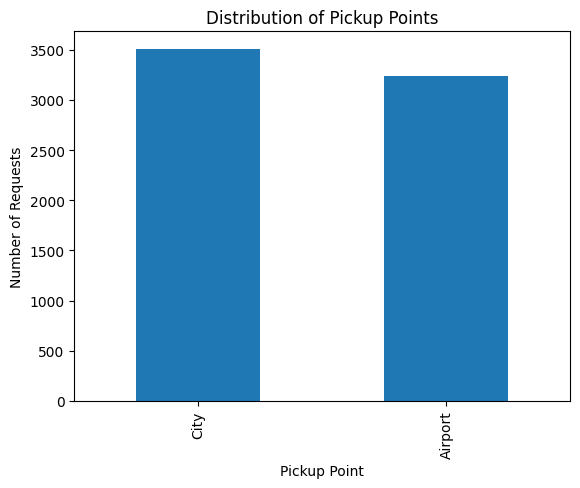

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pickup_counts = df['Pickup point'].value_counts()
pickup_counts.plot(kind='bar')
plt.title('Distribution of Pickup Points')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')





Text(0, 0.5, 'Count')

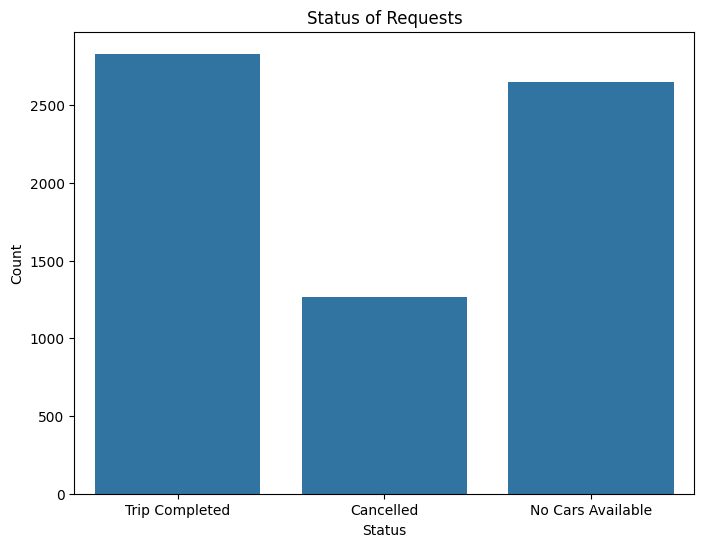

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status')
plt.title('Status of Requests')
plt.xlabel('Status')
plt.ylabel('Count')



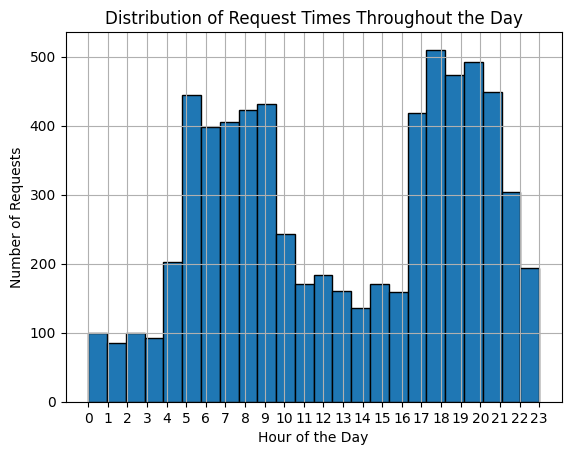

In [ ]:
plt.hist(df['Request_hour'], bins=24, edgecolor='black')
plt.title('Distribution of Request Times Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


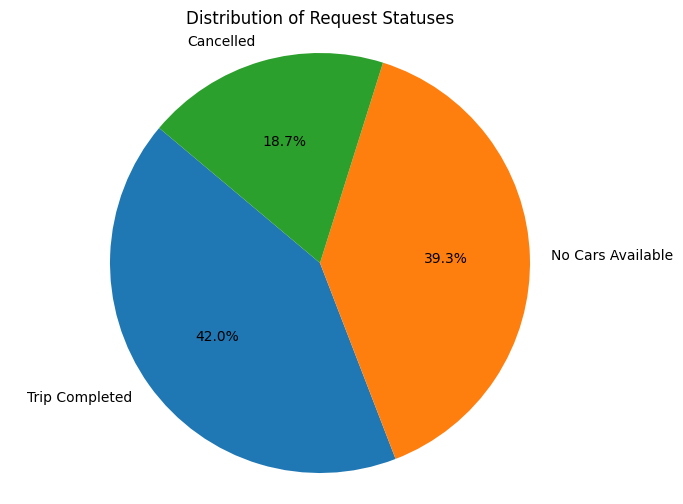

In [ ]:

status_counts = df['Status'].value_counts()


plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Request Statuses')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


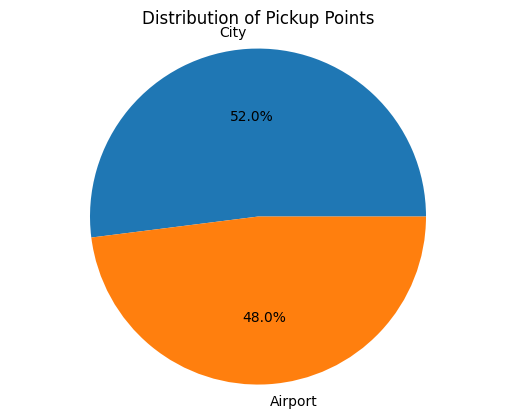

In [ ]:

pickup_counts = df['Pickup point'].value_counts()

pickup_counts.plot(kind='pie', autopct='%1.1f%%',)
plt.title('Distribution of Pickup Points')
plt.axis('equal')
plt.ylabel('')
plt.show()


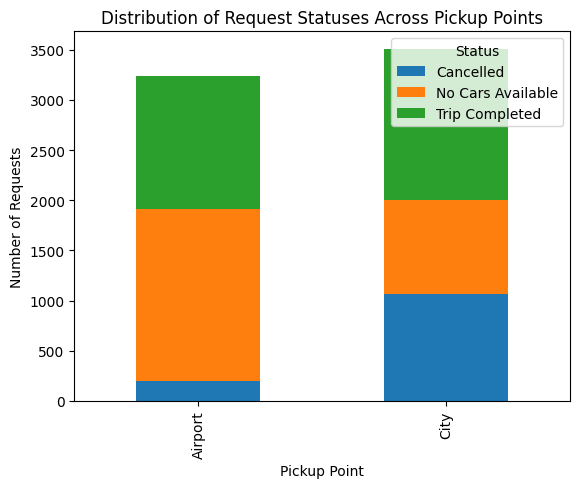

In [ ]:

pivot_table = df.pivot_table(index='Pickup point', columns='Status', aggfunc='size', fill_value=0)

pivot_table.plot(kind='bar', stacked=True)
plt.title('Distribution of Request Statuses Across Pickup Points')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.legend(title='Status')
plt.show()
